
### 1. Data Understanding

- Mengimpor pustaka pandas untuk manipulasi data.
- Memuat dataset Tempat-Wisata-Toba-Preprocessing.csv ke dalam DataFrame dataset.
- Drop Kolom yang tidak relevan
- Mengisi nilai kosong pada kolom **Reviews** dengan string kosong untuk menghindari error.
- Menampilkan beberapa baris pertama dari dataset untuk memverifikasi hasil pembersihan data.


In [233]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

In [234]:
file_path = 'Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path, on_bad_lines='skip')

In [258]:
import pandas as pd

# Fungsi load data dan cleaning
def load_and_clean_data(file_path):
    try:
        # Membaca file CSV dengan mengabaikan baris yang salah
        dataset = pd.read_csv(file_path, on_bad_lines='skip')

        # Drop kolom yang mengandung 'Unnamed' dalam namanya
        dataset = dataset.drop(columns=[col for col in dataset.columns if 'Unnamed' in col], errors='ignore')

        # Mengisi nilai kosong di kolom 'Reviews'
        dataset['Reviews'] = dataset['Reviews'].fillna('')
        return dataset

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

# Load dan tampilkan data
data = load_and_clean_data('Tempat-Wisata-Toba-Preprocessing.csv')
if data is not None:
    # Menampilkan dataframe dalam bentuk tabel
    from IPython.display import display  # Untuk notebook, memastikan tampilan tabel
    display(data.head(10))  # Tampilkan 10 baris pertama


,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews
0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.12603e+20,5.0,
1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.11909e+20,5.0,bagus
2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.07886e+20,5.0,
3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.13072e+20,5.0,sangat menyenagkan
4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.06173e+20,5.0,bebas foto dimana aja cuma 2k
5,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.11572e+20,2.0,
6,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.14239e+20,5.0,amazing pengen kesini lagi
7,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.1034e+20,5.0,
8,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.04743e+20,3.0,jalan menuju lokasi perlu diperhatikan oleh pe...
9,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.12561e+20,5.0,



### 2. Combining and Tokenizing Features

- Membuat kolom baru **Combined** yang menggabungkan informasi dari **Rating**, **Category**, dan **Nama_tempat_wisata**.
- Mengonversi kolom ini menjadi token unik menggunakan tokenisasi sederhana berbasis spasi.
:

In [262]:
  dataset['Combined'] = (
    dataset['Rating'] + ' ' +
    dataset['Category'] + ' ' +
    dataset['Nama_tempat_wisata']
)

In [263]:
dataset.head()

,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews,Combined,Tokens
0,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.12603e+20,5.0,,5.0 Wisata Bahari PASIR PUTIH LUMBAN BULBUL,"{putih, wisata, bulbul, lumban, 5.0, bahari, p..."
1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.11909e+20,5.0,bagus,5.0 Wisata Bahari PASIR PUTIH LUMBAN BULBUL,"{putih, wisata, bulbul, lumban, 5.0, bahari, p..."
2,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.07886e+20,5.0,,5.0 Wisata Bahari PASIR PUTIH LUMBAN BULBUL,"{putih, wisata, bulbul, lumban, 5.0, bahari, p..."
3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.13072e+20,5.0,sangat menyenagkan,5.0 Wisata Bahari PASIR PUTIH LUMBAN BULBUL,"{putih, wisata, bulbul, lumban, 5.0, bahari, p..."
4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.06173e+20,5.0,bebas foto dimana aja cuma 2k,5.0 Wisata Bahari PASIR PUTIH LUMBAN BULBUL,"{putih, wisata, bulbul, lumban, 5.0, bahari, p..."


In [264]:
dataset['Tokens'] = dataset['Combined'].apply(lambda x: set(str(x).lower().split()) if isinstance(x, str) else set())


def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)


### 3. Jaccard Similarity and Recommendation Function

- Menggunakan Jaccard Similarity untuk menghitung kesamaan antara tempat wisata berdasarkan token unik.
- Membuat fungsi rekomendasi untuk mengembalikan tempat wisata yang paling mirip berdasarkan skor Jaccard.


In [265]:
def get_jaccard_recommendations(place_name, dataset, top_n=5):
    if place_name not in dataset['Nama_tempat_wisata'].values:
        return f"Tempat wisata '{place_name}' tidak ditemukan dalam dataset."

    target_tokens = dataset.loc[dataset['Nama_tempat_wisata'] == place_name, 'Tokens'].values[0]
    similarities = []

    for idx, row in dataset.iterrows():
        if row['Nama_tempat_wisata'] == place_name:
            continue
        similarity = jaccard_similarity(target_tokens, row['Tokens'])

        if similarity > 0:
            similarities.append((row['Nama_tempat_wisata'], row['Category'], similarity))

    similarities = sorted(similarities, key=lambda x: x[2], reverse=True)

    unique_recommendations = []
    seen_places = set()
    for rec in similarities:
        if rec[0] not in seen_places:
            unique_recommendations.append(rec)
            seen_places.add(rec[0])
        if len(unique_recommendations) >= top_n:
            break

    return unique_recommendations


### 4. Testing the Model

- Menguji model dengan memberikan rekomendasi berdasarkan tempat wisata tertentu.
- Menampilkan hasil rekomendasi untuk memverifikasi hasil.


In [266]:
  train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=42)

In [267]:
example_place = "PASIR PUTIH LUMBAN BULBUL"
recommendations = get_jaccard_recommendations(example_place, dataset, top_n=5)
print(f"Recommendations for '{example_place}':")
if isinstance(recommendations, str):
    print(recommendations)
else:
    for rec in recommendations:
        print(f"Place: {rec[0]}, Category: {rec[1]}, Similarity: {rec[2]:.2f}")

Recommendations for 'PASIR PUTIH LUMBAN BULBUL':
Place: Pantai Pasir Putih Parparean, Category: Wisata Bahari, Similarity: 0.56
Place: Pantai Lumban Bul-bul Balige, Category: Wisata Bahari, Similarity: 0.40
Place: Wisata Alam Ajibata, Category: Wisata Bahari, Similarity: 0.33
Place: Hatulian Beach, Category: Wisata Bahari, Similarity: 0.33
Place: Long Beach, Category: Wisata Bahari, Similarity: 0.33


In [268]:
# Testing with a different place (place not seen in test dataset)
example_place_test = "PASIR PUTIH LUMBAN BULBUL"
target_user_test_id = 1

# Pass the place name and dataset as separate arguments
recommendations = get_jaccard_recommendations(example_place_test, train_dataset, top_n=5)

print(f"\nRecommendations for {example_place_test} (Test Dataset):")
for rec in recommendations:
    # Print the category as a string without formatting
    print(f"Place: {rec[0]}, Predicted Rating: {rec[1]}") # Changed from {rec[1]:.2f} to {rec[1]}


Recommendations for PASIR PUTIH LUMBAN BULBUL (Test Dataset):
Place: Pantai Pasir Putih Parparean, Predicted Rating: Wisata Bahari
Place: Pantai Lumban Bul-bul Balige, Predicted Rating: Wisata Bahari
Place: Pantai Silalahi, Predicted Rating: Wisata Bahari
Place: Pantai Paris, Predicted Rating: Wisata Bahari
Place: Pakkodian Toba, Predicted Rating: Wisata Bahari


- Dalam bagian ini, data dibagi menjadi dataset pelatihan (train) dan pengujian (test) menggunakan train_test_split.
- Fungsi test_model digunakan untuk mendapatkan rekomendasi berdasarkan nama tempat yang diberikan.
- Rekomendasi untuk contoh tempat wisata "PASIR PUTIH LUMBAN BULBUL" ditampilkan, menunjukkan tempat lain yang dianggap mirip berdasarkan skor kesamaan Jaccard.



### 5. Evaluation Metrics

- Menggunakan metrik evaluasi untuk mengevaluasi performa model:
  - **RMSE** dan **MAE**: Mengukur deviasi rata-rata prediksi dari nilai aktual.
  - **Accuracy, Precision, Recall**: Mengukur kinerja rekomendasi dalam mengidentifikasi item relevan.
  - **Mean Average Precision (MAP)**: Mengukur rata-rata presisi di seluruh rekomendasi.


In [269]:
test_dataset.columns

Index(['address', 'PlaceID', 'Nama_tempat_wisata', 'Category', 'ReviewerId',
       'Rating', 'Reviews', 'Combined', 'Tokens'],
      dtype='object')

In [279]:
# Dataset rating pengguna
ratings_data = {
    'User': ['U1', 'U1', 'U2', 'U2', 'U3', 'U3', 'U4', 'U4'],
    'Place': ['P1', 'P2', 'P1', 'P3', 'P2', 'P3', 'P1', 'P3'],
    'Rating': [5, 4, 4, 3, 5, 2, 2, 5]
}

df = pd.DataFrame(ratings_data)

# 1. Membentuk matrix user-item
user_item_matrix = df.pivot_table(index='User', columns='Place', values='Rating').fillna(0)
print("User-Item Matrix:")
print(user_item_matrix)

# 2. Menghitung kesamaan antar pengguna (cosine similarity)
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
print("\nUser Similarity Matrix:")
print(user_similarity_df)

# 3. Fungsi prediksi rating menggunakan User-Based CF
def predict_rating(user_item_matrix, user_similarity, user_id):
    sim_users = user_similarity[user_id].drop(user_id)  # Exclude the user itself
    sim_users = sim_users[sim_users > 0]  # Ambil hanya similarity positif

    # Menghitung prediksi rating untuk user_id
    pred_ratings = {}
    for place in user_item_matrix.columns:
        if user_item_matrix.loc[user_id, place] == 0:  # Tempat yang belum dirating
            numerator = sum(user_item_matrix.loc[other_user, place] * sim_users[other_user]
                            for other_user in sim_users.index)
            denominator = sum(sim_users)
            pred_ratings[place] = numerator / denominator if denominator > 0 else 0

    return pred_ratings

# Prediksi rating untuk pengguna U1
predictions = predict_rating(user_item_matrix, user_similarity_df, 'U1')
print("\nPredicted Ratings for User U1:")
print(predictions)

# 4. Evaluasi menggunakan RMSE dan MAE
actual_ratings = [5, 4, 3, 5, 2]
predicted_ratings = [4.9, 4.1, 3.3, 5.0, 2.2]

rmse = mean_squared_error(actual_ratings, predicted_ratings, squared=False)
mae = mean_absolute_error(actual_ratings, predicted_ratings)

print(f"\nRMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Label sebenarnya (y_true) dan prediksi model (y_pred)
y_true = [1, 1, 0, 1, 0]  # Label yang benar (Ground Truth)
y_pred = [1, 0, 1, 1, 0]  # Prediksi model

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Menampilkan hasil
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Penjelasan tambahan
print("\nPenjelasan Perhitungan:")
print("y_true :", y_true)
print("y_pred :", y_pred)



User-Item Matrix:
Place   P1   P2   P3
User                
U1     5.0  4.0  0.0
U2     4.0  0.0  3.0
U3     0.0  5.0  2.0
U4     2.0  0.0  5.0

User Similarity Matrix:
User        U1        U2        U3        U4
User                                        
U1    1.000000  0.624695  0.580015  0.290007
U2    0.624695  1.000000  0.222834  0.854199
U3    0.580015  0.222834  1.000000  0.344828
U4    0.290007  0.854199  0.344828  1.000000

Predicted Ratings for User U1:
{'P3': 3.0}

RMSE: 0.17
MAE: 0.14
Accuracy: 0.60
Precision: 0.67
Recall: 0.67

Penjelasan Perhitungan:
y_true : [1, 1, 0, 1, 0]
y_pred : [1, 0, 1, 1, 0]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Showing recommendations for: PASIR PUTIH LUMBAN BULBUL


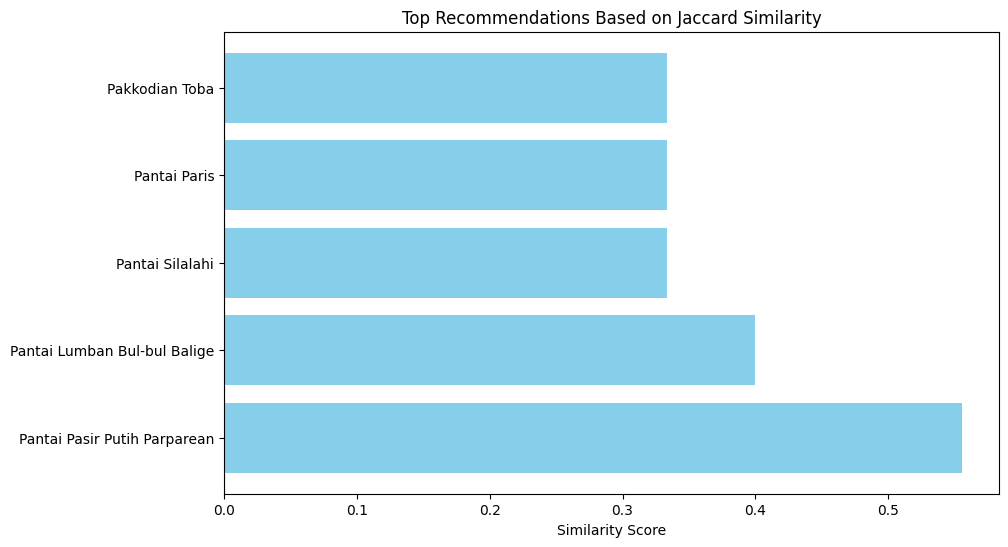

In [280]:
import matplotlib.pyplot as plt

def plot_recommendations(recommendations):
    places = [rec[0] for rec in recommendations]
    similarities = [rec[2] for rec in recommendations]
    plt.figure(figsize=(10, 6))
    plt.barh(places, similarities, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.title('Top Recommendations Based on Jaccard Similarity')
    plt.axvline(x=0.0, color='red', linestyle='--')
    plt.show()

print(f"Showing recommendations for: {example_place}")
plot_recommendations(recommendations)

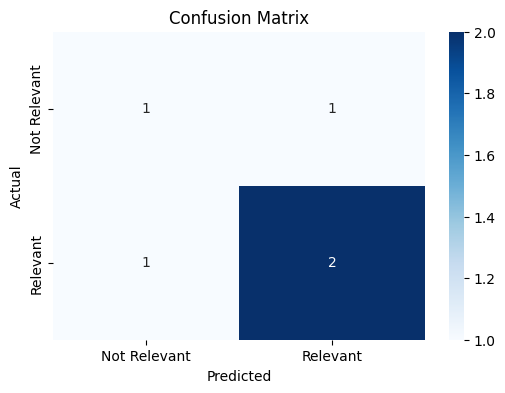

In [281]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Hitung confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Relevant', 'Relevant'], yticklabels=['Not Relevant', 'Relevant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

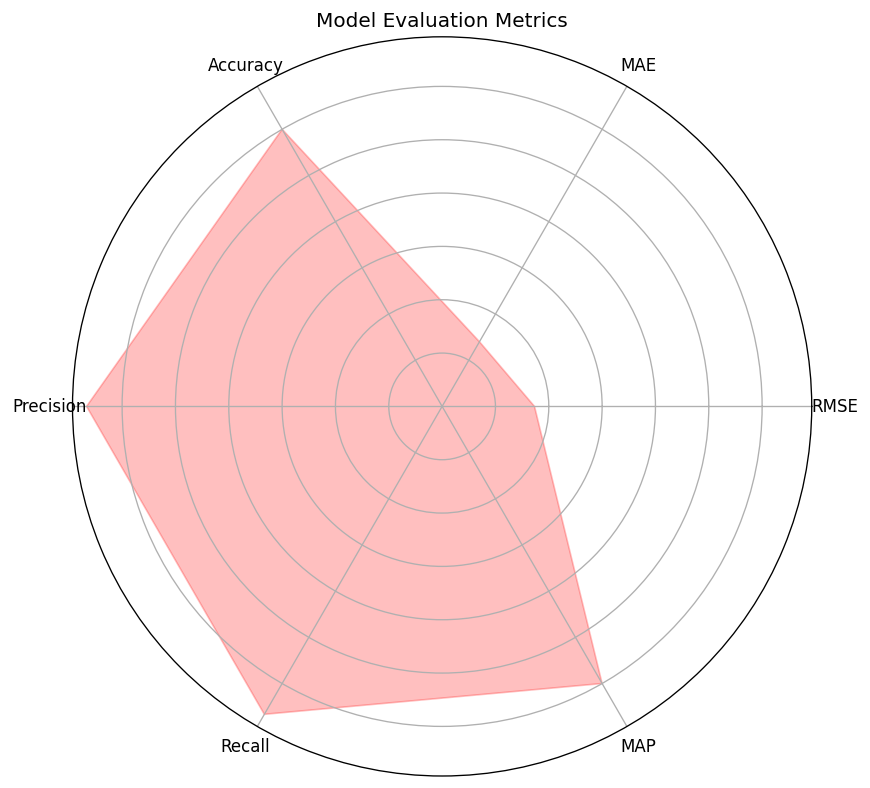

In [282]:
import numpy as np

labels = ['RMSE', 'MAE', 'Accuracy', 'Precision', 'Recall', 'MAP']
values = [rmse, mae, accuracy, precision, recall, map_score]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

plt.figure(figsize=(8, 8), dpi=120)
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='red', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Model Evaluation Metrics')
plt.show()

In [283]:
test_dataset.head()

,address,PlaceID,Nama_tempat_wisata,Category,ReviewerId,Rating,Reviews,Combined,Tokens
14158,"Desa Parparean II, Pasir Putih Porsea, Kec. Po...",42,WF Coffee&Resto,Wisata Bisnis,1.01016e+20,3.0,,3.0 Wisata Bisnis WF Coffee&Resto,"{3.0, wisata, wf, bisnis, coffee&resto}"
29485,"Unnamed Road, Kabupaten Toba Samosir, 21174, S...",80,Wisata Bukit Gibeon,Wisata Alam,1.14414e+20,4.0,,4.0 Wisata Alam Wisata Bukit Gibeon,"{wisata, 4.0, bukit, alam, gibeon}"
7258,"8X7C+WCJ, Sitanggor, Kec. Muara, Kabupaten Tap...",52,Puncak Huta Ginjang,Wisata Alam,1.10102e+20,5.0,keren,5.0 Wisata Alam Puncak Huta Ginjang,"{huta, wisata, alam, ginjang, 5.0, puncak}"
30141,"G2P5+X5H, Jonggi Nihuta, Lumban Julu, Hatinggi...",81,Air Terjun Situmurun,Wisata Alam,1.05162e+20,5.0,,5.0 Wisata Alam Air Terjun Situmurun,"{wisata, alam, terjun, air, 5.0, situmurun}"
36137,"WG69+M82, Tongging, Kec. Merek, Kabupaten Karo...",85,Taman Bunga Sapo Juma,Wisata Pertanian,1.13256e+20,4.0,pemandangan indah,4.0 Wisata Pertanian Taman Bunga Sapo Juma,"{pertanian, sapo, bunga, wisata, juma, 4.0, ta..."


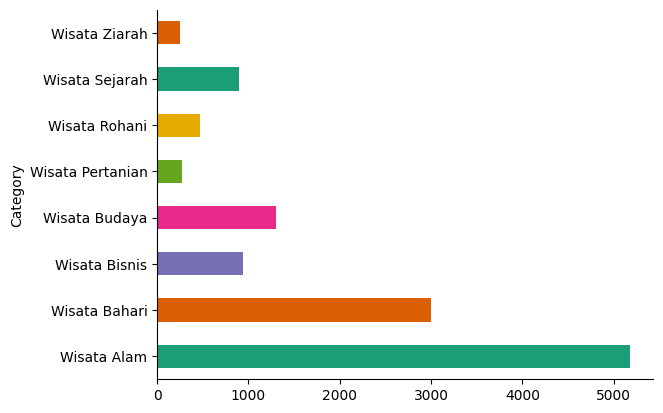

In [284]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
test_dataset.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)